# Récupération des données de mobilité humaines de Apple

> Ce Notebook présente les données de mobilités humaines depuis le début de la pandémie.

> Les données de mobilités humaines sont fournies par Apple et accessibles à l'adresse suivante : https://covid19.apple.com/mobility. Les données de mobilités commencent à partir du **13 Janvier 2020**. La référence (0%) est faite sur la valeur médiane des données du **13 Janvier 2020**.

## Importation des modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from seismic_noise import *
import pandas as pd
import urllib.request
import json

## Paramètres initiaux

In [2]:
data_path = "DATA/apple_mobility"
tags = {
    "2020-03-17":"Confinement 1",
    "2020-05-11":"Déconfinement",
    "2020-10-30":"Confinement 2",
    "2020-12-15":"Confinement 1",
    "2021-04-03":"Confinement 3",
    "2021-05-03":"Déconfinement"
}
dates_tags = [key for key in tags.keys()]
dates_tags = pd.to_datetime(dates_tags)

## Récupération des données de mobilité

Récupération des données au moyen de la fonction `load_apple_mobility()` située dans le module `seismic_noise` à la racine du répertoire.

In [3]:
# Création et préparation des dossiers
if os.path.isdir(data_path):
    if os.path.isfile(data_path + "/apple_mobility.csv"):
        filelist = [ f for f in os.listdir(data_path) ]
        for f in filelist:
            try:
                os.remove(os.path.join(data_path, f))
            except:
                pass
else:
    os.makedirs(data_path)
    
# Téléchargement des données
data = load_apple_mobility(download_data=True)

<ipython-input-3-55b3fa60541f>:14: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  data = load_apple_mobility(download_data=True)


#### Récupération des données sur la France entière

In [4]:
data_country = load_apple_mobility(data_type = "country")
data_country

<ipython-input-4-50829d23b186>:1: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  data_country = load_apple_mobility(data_type = "country")


,driving,transit,walking
2020-01-13,100.0,100.0,100.0
2020-01-14,101.6,100.31,105.95
2020-01-15,104.67,102.48,108.49
2020-01-16,107.25,103.75,121.22
2020-01-17,112.07,106.97,117.98
...,...,...,...
2021-07-29,162.9,180.69,132.13
2021-07-30,186.91,178.77,130.88
2021-07-31,188.43,167.73,136.19
2021-08-01,162.46,153.98,108.8


#### Récupération des données par région

In [5]:
data_region = load_apple_mobility(data_type = "region")
data_region

<ipython-input-5-c9008f3fae1b>:1: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  data_region = load_apple_mobility(data_type = "region")


,region,driving,walking,transit
2020-01-13,Corsica Region,100.0,NaN,NaN
2020-01-14,Corsica Region,97.23,NaN,NaN
2020-01-15,Corsica Region,100.16,NaN,NaN
2020-01-16,Corsica Region,95.36,NaN,NaN
2020-01-17,Corsica Region,87.99,NaN,NaN
...,...,...,...,...
2021-07-29,Languedoc-Roussillon,284.06,315.64,671.19
2021-07-30,Languedoc-Roussillon,351.86,316.3,691.49
2021-07-31,Languedoc-Roussillon,382.79,340.24,694.71
2021-08-01,Languedoc-Roussillon,329.44,325.84,682.67


#### Récupération des données par ville

In [6]:
data_city = load_apple_mobility(data_type = "city")
data_city

<ipython-input-6-6c6c15683152>:1: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  data_city = load_apple_mobility(data_type = "city")


,city,driving,walking,transit
2020-01-13,Grenoble,100.0,100.0,NaN
2020-01-14,Grenoble,105.45,117.16,NaN
2020-01-15,Grenoble,110.14,118.93,NaN
2020-01-16,Grenoble,118.24,142.33,NaN
2020-01-17,Grenoble,124.28,112.45,NaN
...,...,...,...,...
2021-07-29,Rouen,125.77,134.38,NaN
2021-07-30,Rouen,138.77,134.67,NaN
2021-07-31,Rouen,128.02,136.63,NaN
2021-08-01,Rouen,100.91,85.44,NaN


## Affichage des données sur la France entière

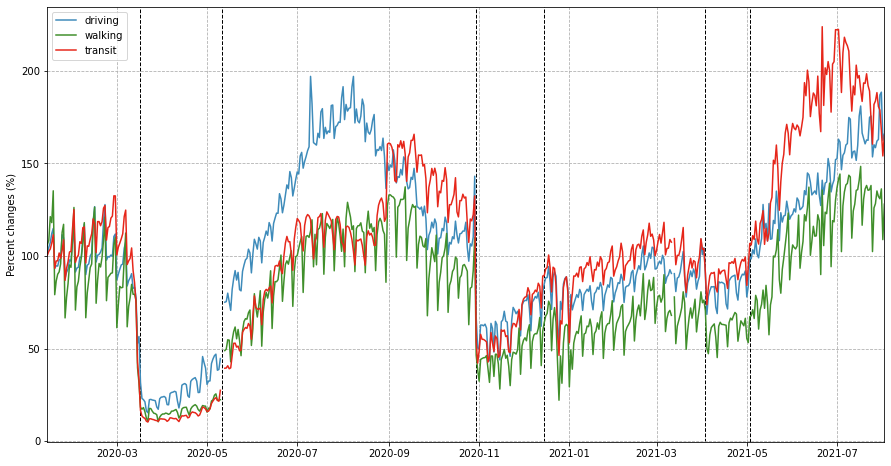

In [7]:
colors = ["#3E8BBA", "#408F2B", "#E6261A"]
plt.figure(figsize=(15,8))
plt.plot(data_country.index, data_country["driving"], label="driving", color=colors[0])
plt.plot(data_country.index, data_country["walking"], label="walking", color=colors[1])
plt.plot(data_country.index, data_country["transit"], label="transit", color=colors[2])
[plt.axvline(dates_tags[i], color="black", ls="--", lw=1, zorder=0) for i in range(len(dates_tags))]
plt.legend()
plt.ylabel("Percent changes (%)")
plt.grid(ls='--')
plt.xlim(data_country.index[1], data_country.index[-1])
plt.show()

## Affichage des données par région

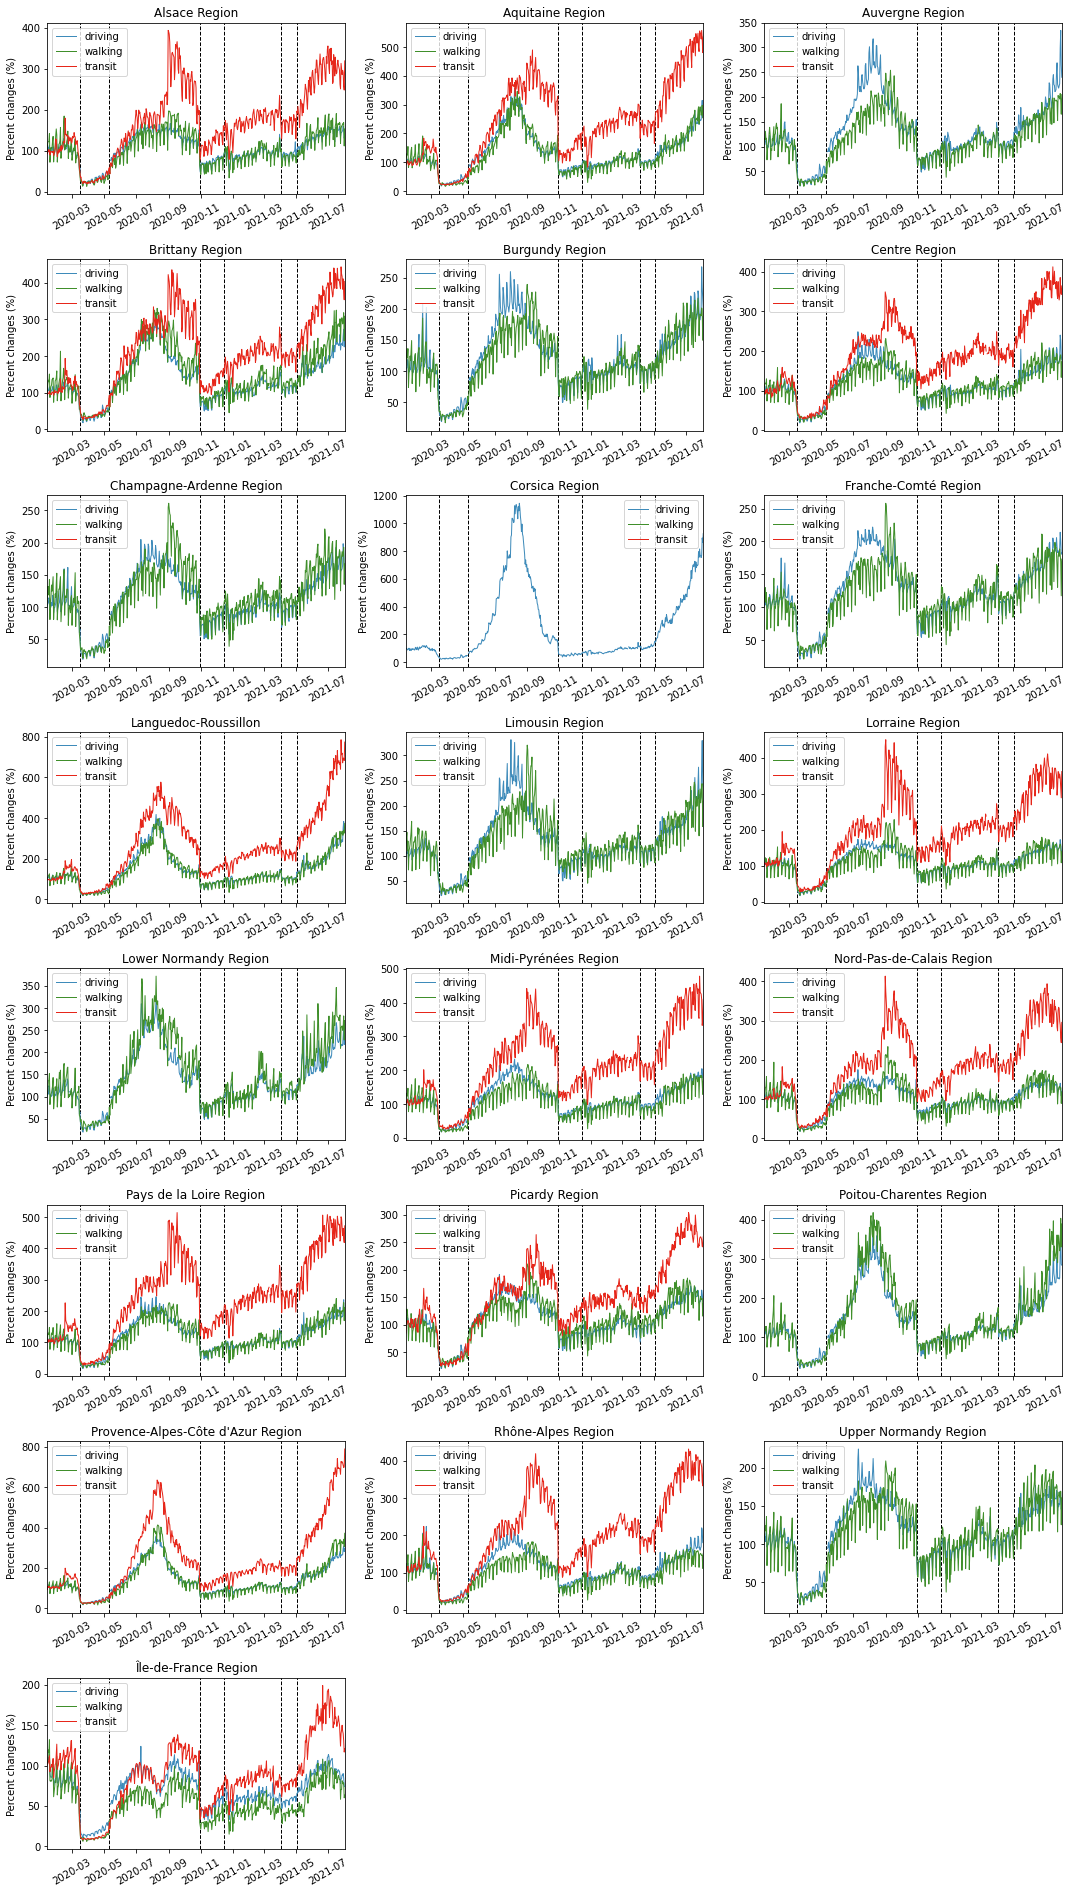

In [8]:
rg_name = list(set(data_region["region"]))
rg_name.sort()
plt.figure(figsize=(15,1.2*len(rg_name)))

for i, rg in enumerate(rg_name):
    data_rg = data_region.loc[ data_region["region"] == rg ] # Données sur l'ensemble de la région

    # Graphique sur la région
    plt.subplot(ceil(len(rg_name)/3), 3, i+1)
    plt.plot(data_rg.index, data_rg["driving"], label="driving", color=colors[0], lw=1)
    plt.plot(data_rg.index, data_rg["walking"], label="walking", color=colors[1], lw=1)
    plt.plot(data_rg.index, data_rg["transit"], label="transit", color=colors[2], lw=1)
    [plt.axvline(dates_tags[i], color="black", ls="--", lw=1, zorder=0) for i in range(len(dates_tags))]
    plt.legend()
    plt.ylabel("Percent changes (%)")
    plt.xlim(data_rg.index[1], data_rg.index[-1])
    plt.xticks(rotation=30)
    plt.title(rg)
    
    plt.tight_layout()

## Affichage des données par ville

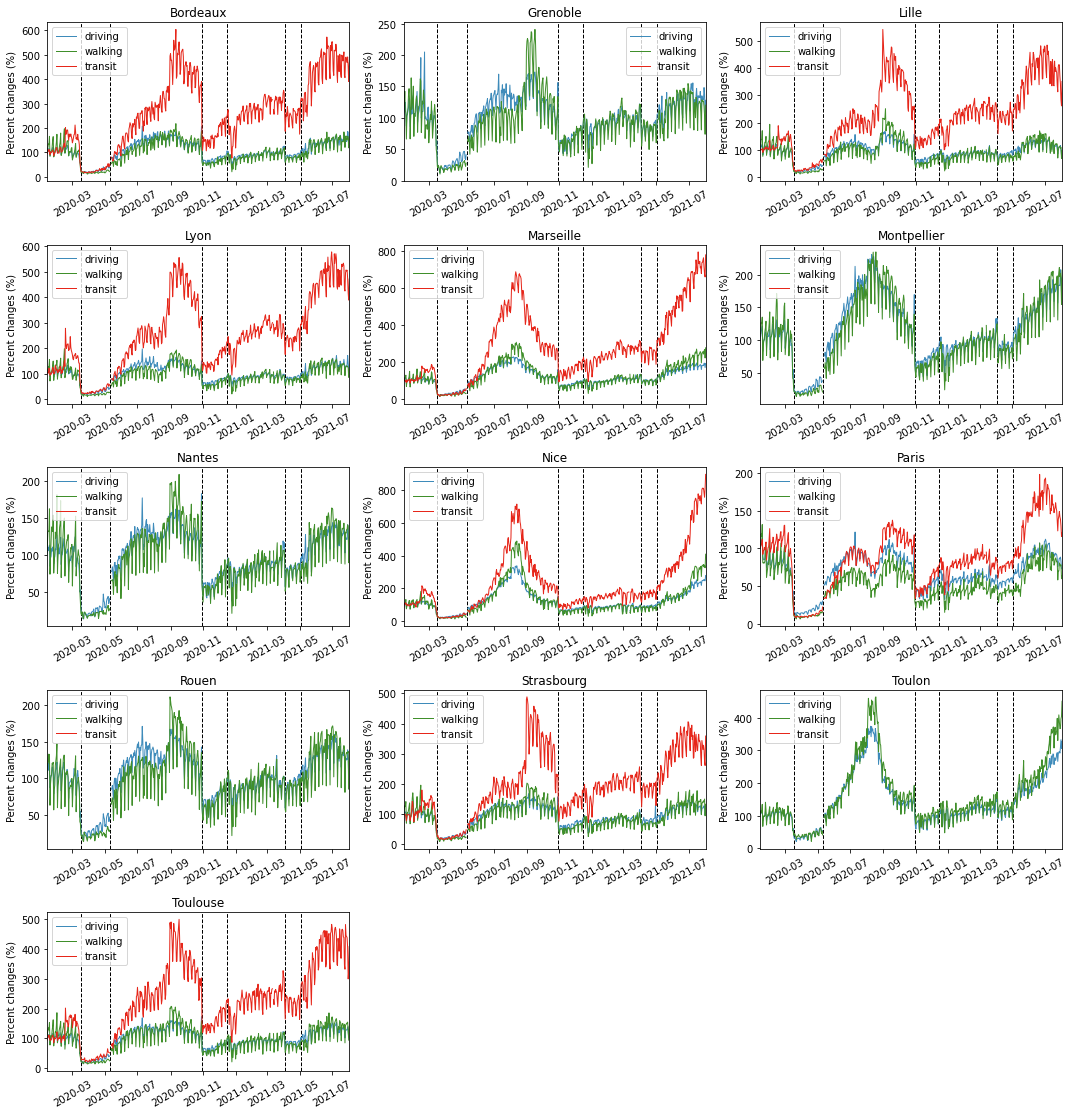

In [9]:
city_name = list(set(data_city["city"]))
city_name.sort()
plt.figure(figsize=(15,1.2*len(city_name)))

for i, city in enumerate(city_name):
    data_sub = data_city.loc[ data_city["city"] == city ] # Données sur l'ensemble de la région

    # Graphique sur la région
    plt.subplot(ceil(len(city_name)/3), 3, i+1)
    plt.plot(data_sub.index, data_sub["driving"], label="driving", color=colors[0], lw=1)
    plt.plot(data_sub.index, data_sub["walking"], label="walking", color=colors[1], lw=1)
    plt.plot(data_sub.index, data_sub["transit"], label="transit", color=colors[2], lw=1)
    [plt.axvline(dates_tags[i], color="black", ls="--", lw=1, zorder=0) for i in range(len(dates_tags))]
    plt.legend()
    plt.ylabel("Percent changes (%)")
    plt.xlim(data_sub.index[1], data_sub.index[-1])
    plt.xticks(rotation=30)
    plt.title(city)
    
    plt.tight_layout()